In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


import datetime

In [2]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%b-%y')
dateparse

<function __main__.<lambda>(dates)>

In [3]:
df = pd.read_csv('Data_Project_1.csv',
                 parse_dates=['Period'],
                 date_parser=dateparse,
                 index_col='Period')

In [4]:
df.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [5]:
df.shape

(242, 1)

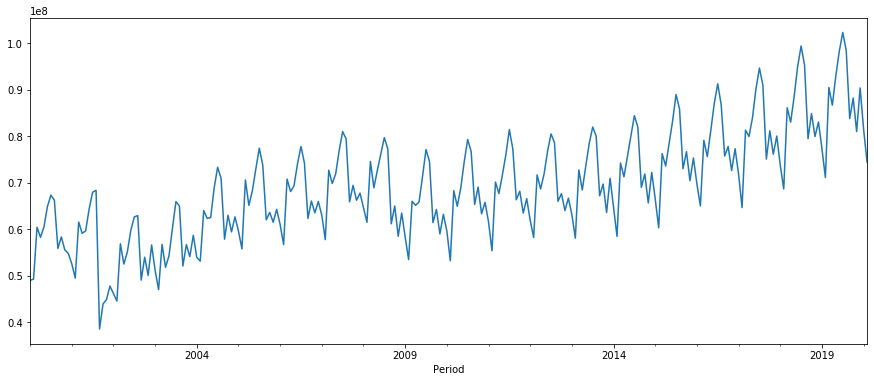

In [6]:
plt.figure(figsize=(15,6))
df.Total.plot(kind='line');

 <font size="3"><font color='red'>**by looking at line plot , we can say that there is a trend and seasonality in data.**</font></font>

 <font size="3"><font color='PURPLE'>**DECOMPOSITION**</font></font>

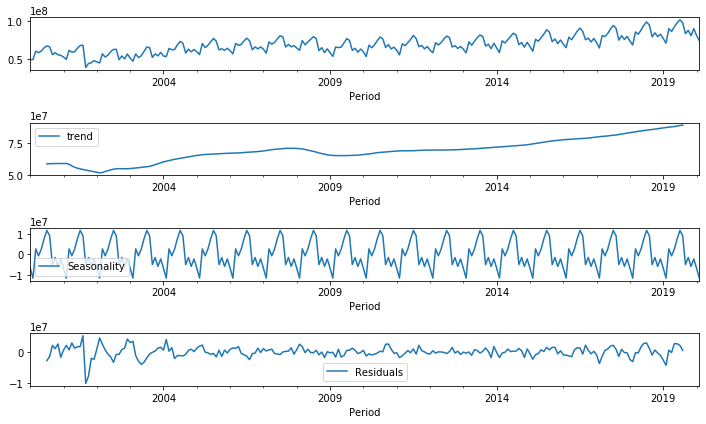

In [7]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.Total.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

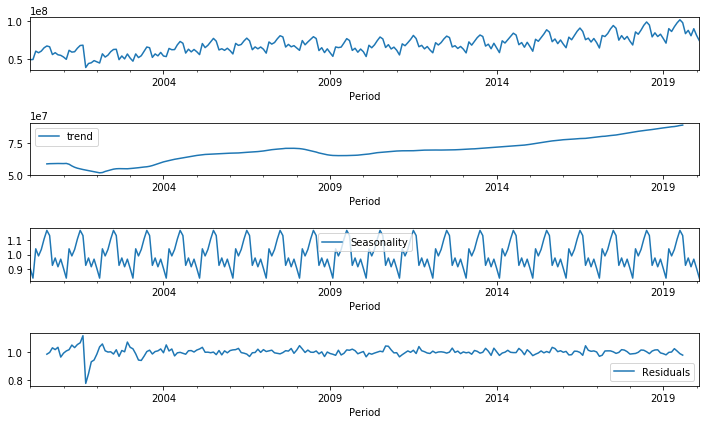

In [8]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='multiplicative', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.Total.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

 <font size="2
 "><font color='green'>**So, there is trend, seasonality and noise in the data. so we will go for three parameter exponential smoothing.**</font></font>

<font size="3"><font color='purple'>**SPLITTING DATA**</font></font>

In [9]:
#8:2
train = df[0:192]
test = df[192:]

<font size="5"><font color='purple'>**EXPONENTIAL SMOOTHING**</font></font>

<font size="3"><font color='purple'>**holt's winter exponential smoothing**</font></font>
<font size="3"><font color='orange'>**additive**</font></font>

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,192
Model:,ExponentialSmoothing,SSE,18708041430402128.000
Optimized:,True,AIC,6216.365
Trend:,Additive,BIC,6268.485
Seasonal:,Additive,AICC,6220.319
Seasonal Periods:,12,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,21:26:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,True
smoothing_slope,0.000000,beta,True


<font size="3"><font color='purple'>**holt's winter exponential smoothing**</font></font>
<font size="3"><font color='orange'>**multiplicative**</font></font>

In [11]:
from statsmodels.tsa.api import ExponentialSmoothing
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="Multiplicative").fit()
hwes.summary()

C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,192
Model:,ExponentialSmoothing,SSE,642986976304442.000
Optimized:,True,AIC,5569.213
Trend:,Additive,BIC,5621.333
Seasonal:,Multiplicative,AICC,5573.167
Seasonal Periods:,12,Date:,"Wed, 30 Sep 2020"
Box-Cox:,False,Time:,21:26:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6503051,alpha,True
smoothing_slope,0.0013157,beta,True


In [12]:
hwes1 = hwes.forecast(50)

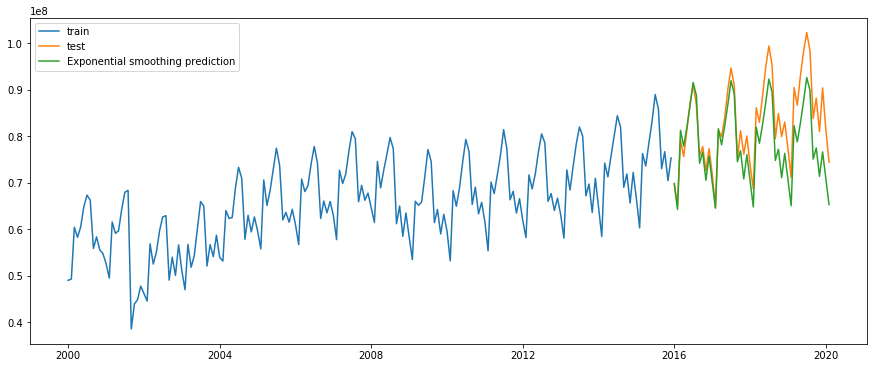

In [13]:
plt.figure(figsize=(15,6))
plt.plot(train.Total,label='train')
plt.plot(test.Total,label='test')
plt.plot(hwes1,label='Exponential smoothing prediction')
plt.legend();

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
print(mean_absolute_error(y_true=test,y_pred=hwes1))

4868520.663536679


In [16]:
print('RMSE :',np.sqrt(mean_squared_error(test, hwes1)))

RMSE : 6043058.181280983


<font size="5"><font color='purple'>**ARIMA MODEL**</font></font>


<font size="3"><font color='purple'>**Stationarity of data**</font></font>

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

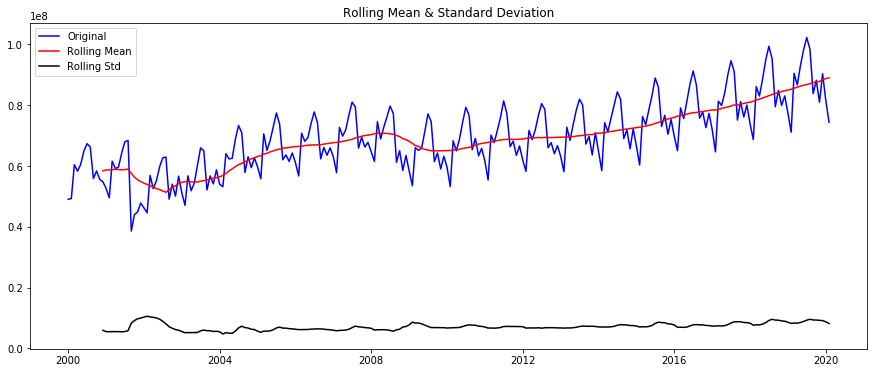

Results of Dickey-Fuller Test:
Test Statistic                   0.223770
p-value                          0.973564
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [18]:
plt.figure(figsize=(15,6))
test_stationarity(df)

In [19]:
diff1=train.diff(12)
diff1=diff1.dropna()

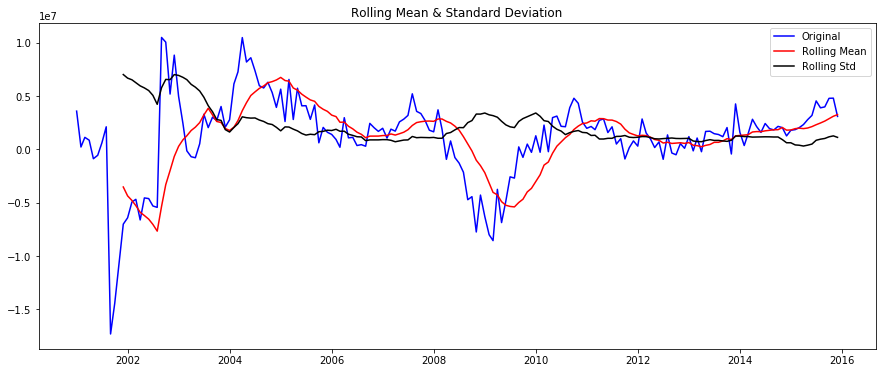

Results of Dickey-Fuller Test:
Test Statistic                  -2.983041
p-value                          0.036509
#Lags Used                      14.000000
Number of Observations Used    165.000000
Critical Value (1%)             -3.470616
Critical Value (5%)             -2.879221
Critical Value (10%)            -2.576197
dtype: float64


In [20]:
plt.figure(figsize=(15,6))
test_stationarity(diff1)

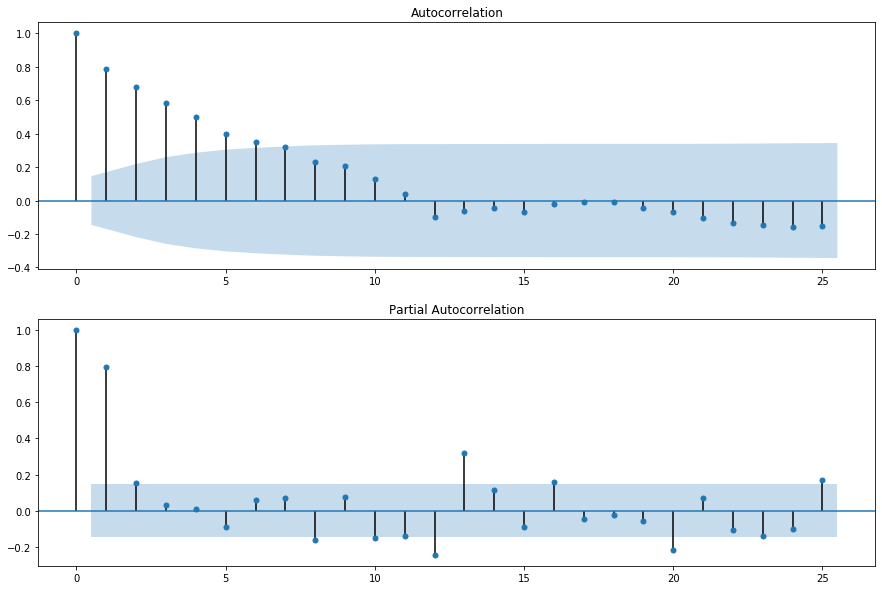

In [21]:
from statsmodels.tsa.stattools import acf, pacf
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=25)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=25)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5790.155, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5789.248, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5788.503, Time=0.73 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5791.584, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5780.206, Time=1.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5789.160, Time=0.56 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5781.459, Time=5.45 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5781.616, Time=6.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5785.235, Time=1.94 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5789.194, Time=4.25 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=5784.202, Time=5.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.41 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=5781.452, Time=2.85 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=5793.243, Time=2.01 sec
 ARIMA(1,1,0)(1,1,1)[12]

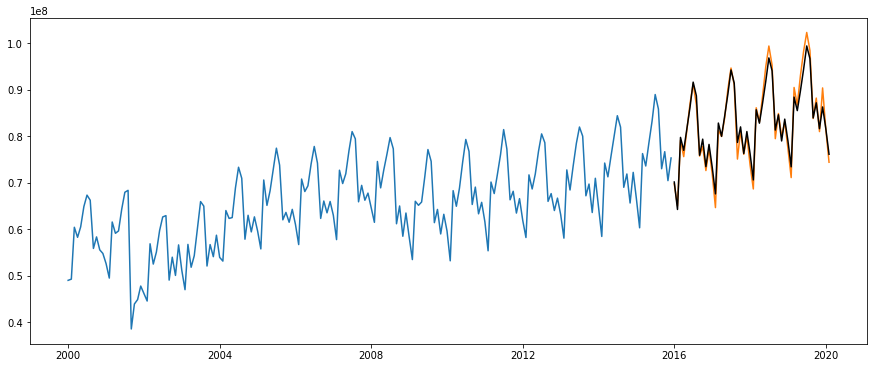

In [22]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=3, max_Q=8, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(15,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [23]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2886.103
Date:                            Wed, 30 Sep 2020   AIC                           5780.206
Time:                                    21:27:26   BIC                           5792.956
Sample:                                         0   HQIC                          5785.376
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0597      0.024     -2.488      0.013      -0.107      -0.013
ar.S.L12       0.5738      0.071   

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model_ = sm.tsa.SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,1,12))

model_fit=model_.fit(disp=True)
print(model_fit.summary())

C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  192
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2886.103
Date:                            Wed, 30 Sep 2020   AIC                           5780.206
Time:                                    21:27:28   BIC                           5792.956
Sample:                                01-01-2000   HQIC                          5785.376
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0597      0.024     -2.488      0.013      -0.107      -0.013
ar.S.L12       0.5738      0.071   

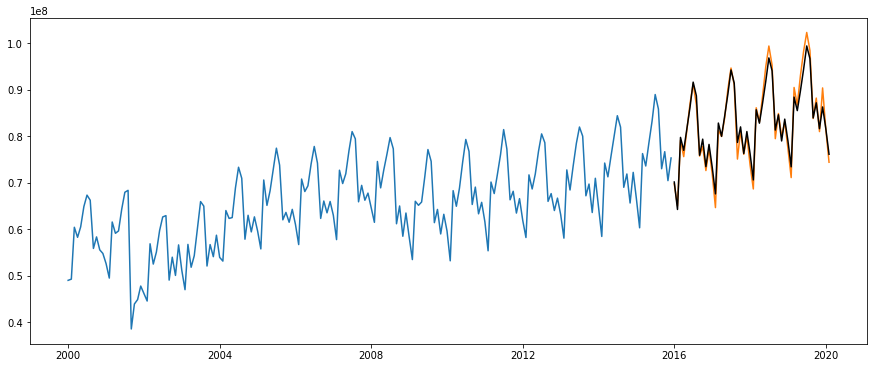

In [25]:
forecast = model_fit.forecast(steps=50)
#print(forecast)

#plot the predictions for validation set
plt.figure(figsize=(15,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [26]:
print(mean_absolute_error(y_true=test,y_pred=forecast))
print('RMSE :',np.sqrt(mean_squared_error(test, forecast)))

1352036.4536741404
RMSE : 1716615.6102358187


# comparison of models

**MODELS**|**RMSE**
-----------------|--------------
holt's winter exponential smoothing  |  6043058.181280983
S-ARIMA |1716615.6102358187

**so RMSE value of S-ARIMA model is lesser than RMSE of hwes so we will do forecasting using  S-ARIMA model.**

# final forecasting

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model_ = sm.tsa.SARIMAX(df, order=(0,1,1), seasonal_order=(1,1,1,12))

model_fit=model_.fit(disp=True)
print(model_fit.summary())

C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Abhijit Chendvankar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  242
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3677.626
Date:                            Wed, 30 Sep 2020   AIC                           7363.252
Time:                                    21:27:31   BIC                           7376.987
Sample:                                01-01-2000   HQIC                          7368.793
                                     - 02-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0839      0.018     -4.600      0.000      -0.120      -0.048
ar.S.L12       0.5309      0.063   

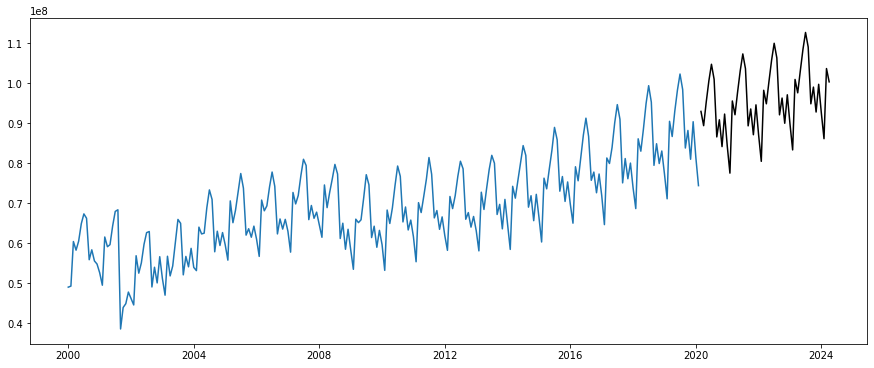

In [28]:
forecast = model_fit.forecast(steps=50)
#print(forecast)


plt.figure(figsize=(15,6))
plt.plot(df, label='data')

plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [29]:
forecast

2020-03-01    9.294657e+07
2020-04-01    8.938291e+07
2020-05-01    9.524633e+07
2020-06-01    1.005929e+08
2020-07-01    1.047212e+08
2020-08-01    1.009608e+08
2020-09-01    8.657345e+07
2020-10-01    9.085572e+07
2020-11-01    8.415353e+07
2020-12-01    9.228187e+07
2021-01-01    8.428598e+07
2021-02-01    7.752906e+07
2021-03-01    9.555037e+07
2021-04-01    9.210880e+07
2021-05-01    9.774470e+07
2021-06-01    1.031175e+08
2021-07-01    1.073044e+08
2021-08-01    1.036098e+08
2021-09-01    8.933498e+07
2021-10-01    9.355885e+07
2021-11-01    8.711968e+07
2021-12-01    9.458458e+07
2022-01-01    8.704698e+07
2022-02-01    8.047427e+07
2022-03-01    9.822118e+07
2022-04-01    9.484442e+07
2022-05-01    1.003595e+08
2022-06-01    1.057463e+08
2022-07-01    1.099642e+08
2022-08-01    1.063046e+08
2022-09-01    9.208952e+07
2022-10-01    9.628239e+07
2022-11-01    8.998285e+07
2022-12-01    9.709554e+07
2023-01-01    8.980125e+07
2023-02-01    8.332634e+07
2023-03-01    1.009276e+08
2